In [1]:
%load_ext autoreload
%autoreload 2
import random
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

import netgen as ng

In [109]:
ng.setDirectory('autotestZ')

In [110]:
ng.configureSweep(popscale=0.5, BaseStim = 2.3, WrongStim = [2.50], RightStim = [2.54], Dynamic=[30], direct=[1], indirect=[1], STNExtEff = [1.7,1.8])

2

In [90]:
ng.compileAndRunSweep(50,0,2)

KeyboardInterrupt: 

In [91]:
results = ng.readAllTrialResults(40,0,2)

In [92]:
decisions = []
for sn in range(2):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs(result)['decision made'])

In [93]:
rightreact = []
wrongreact = []
accuracy = []
completed = []
for sn in range(2):
    rightreact.append([])
    wrongreact.append([])
    for decision in decisions[sn]:
        if decision['pathvals'] is None:
            continue 
        elif decision['pathvals'] == [0]:
            rightreact[sn].append(decision['delay'])
        else:
            wrongreact[sn].append(decision['delay'])
    completed.append((len(rightreact[sn])+len(wrongreact[sn]))/len(decisions[sn]))
    if len(rightreact[sn])+len(wrongreact[sn]) > 0:
        accuracy.append(len(rightreact[sn])/(len(rightreact[sn])+len(wrongreact[sn])))
    else:
        accuracy.append(-1)

In [94]:
for sn in range(2):
    print((sum(rightreact[sn])+sum(wrongreact[sn])) / (len(rightreact[sn]) + len(wrongreact[sn])))

190.092582084
190.092582084


In [81]:
print(accuracy,completed)

[0.8, 0.8] [0.2777777777777778, 0.2777777777777778]


In [106]:
results[0][0]['STNExtEff']

1.7

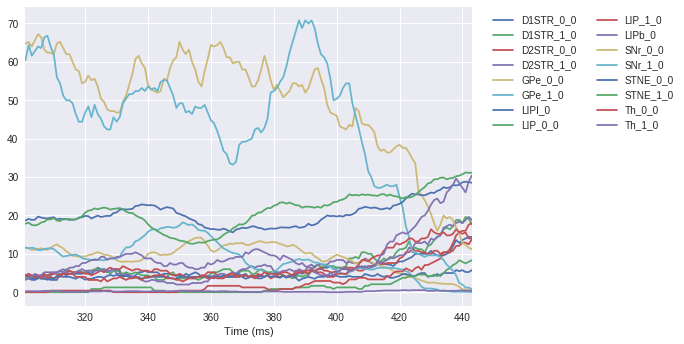

In [96]:
results[0][0]['popfreqs'].plot(x='Time (ms)')
# _ = plt.legend(fontsize=13)
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          ncol=2, fancybox=True, shadow=True)

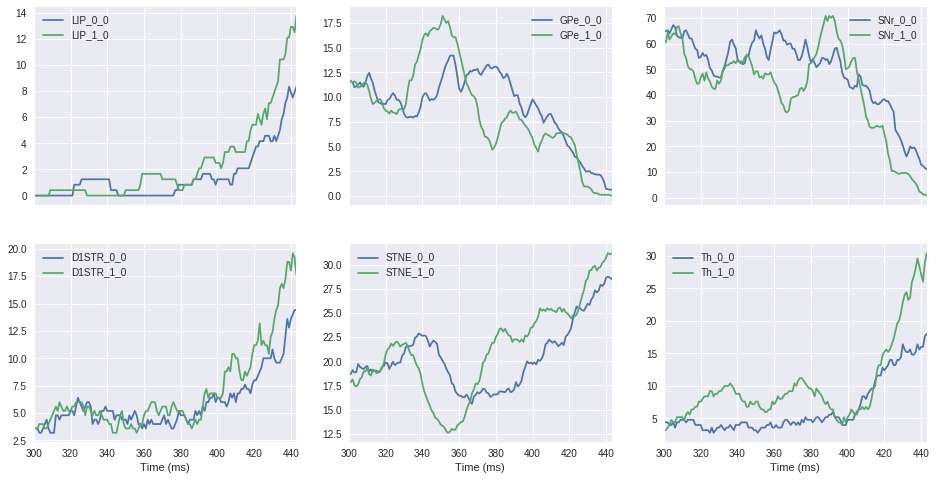

In [103]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(16,8), sharex=True)
result = results[1][0]
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='SNr_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])

for ax, axx in zip(ax1, ax2):
    ax.set_xlim(300, ax.get_xlim()[-1])
    axx.set_xlim(300, ax.get_xlim()[-1])

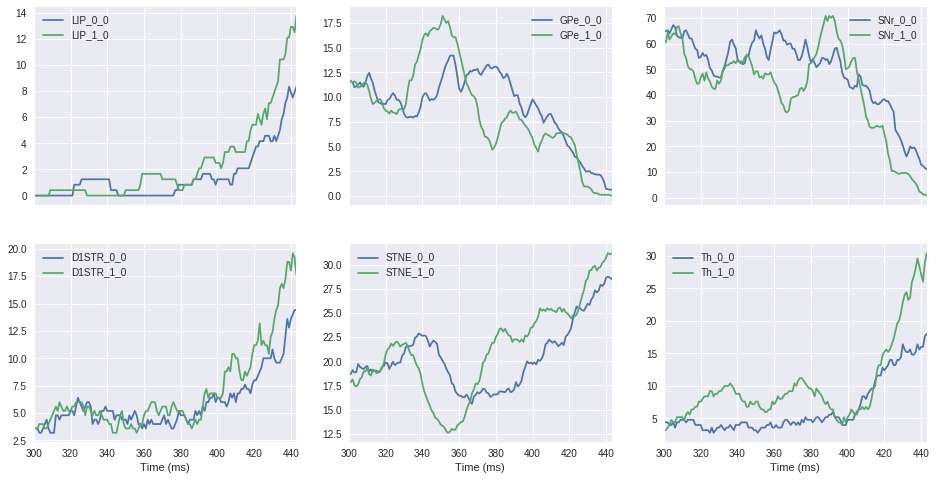

In [104]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(16,8), sharex=True)
result = results[0][0]
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='SNr_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])

for ax, axx in zip(ax1, ax2):
    ax.set_xlim(300, ax.get_xlim()[-1])
    axx.set_xlim(300, ax.get_xlim()[-1])